In [62]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np

In [63]:
data = pd.read_csv("C:\\Users\\neeth\\Downloads\\mlLab\\dataset\\covid.csv")
data.head(5)

,no,pc,wbc,mc,ast,bc,ldh,diagnosis
0,1,Low,Low,Low,High,Normal,Normal,True
1,2,Low,Low,Normal,High,Normal,High,True
2,3,Low,High,Normal,High,Normal,Normal,False
3,4,Low,High,Normal,High,High,Normal,True
4,5,Low,Normal,High,High,Normal,Normal,False


In [64]:
le = preprocessing.LabelEncoder()
pc = le.fit_transform(data['pc'].values)
wbc = le.fit_transform(data['wbc'].values)
mc = le.fit_transform(data['mc'].values)
ast = le.fit_transform(data['ast'].values)
bc = le.fit_transform(data['bc'].values)
ldh = le.fit_transform(data['ldh'].values)
y = le.fit_transform(data['diagnosis'].values)


In [65]:
x = np.array(list(zip(pc,wbc,mc,ast,bc,ldh)))

In [66]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [67]:
model = MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [68]:
y_pred=model.predict(x_test)


In [69]:
print("Accuracy is ",accuracy_score(y_test,y_pred))
print("Report ",classification_report(y_test,y_pred))

Accuracy is  0.7142857142857143
Report                precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.80      0.80      0.80         5

    accuracy                           0.71         7
   macro avg       0.65      0.65      0.65         7
weighted avg       0.71      0.71      0.71         7



In [70]:
lr_probas = model.predict_proba(x_test)
lr_probas = lr_probas[:,1]
lr_fpr,lr_tpr,lr=roc_curve(y_test,lr_probas)

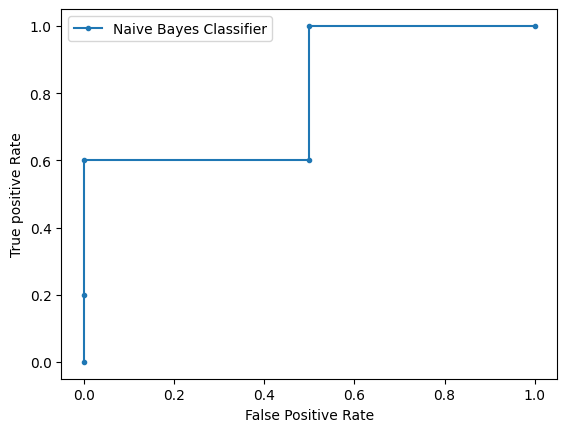

In [71]:
from matplotlib import pyplot
pyplot.plot(lr_fpr,lr_tpr,marker='.',label="Naive Bayes Classifier")
pyplot.xlabel("False Positive Rate")
pyplot.ylabel("True positive Rate")
pyplot.legend()
pyplot.show()